In [225]:
import pandas as pd
from pandas import Timestamp
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

from konlpy.tag import Okt
import konlpy
import nltk
from collections import Counter

In [259]:
# 시각화를 위한 한글폰트 설정 
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [362]:
df = pd.read_csv("news_15.csv")
df.index= df["Date"]
df.drop("Date",axis=1, inplace= True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2021-03-01', '2021-03-01', '2021-03-01', '2021-03-01',
               '2021-03-01', '2021-03-02', '2021-03-02', '2021-03-02',
               '2021-03-02', '2021-03-02',
               ...
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30'],
              dtype='datetime64[ns]', name='Date', length=419, freq=None)

In [370]:
# 대소문자 구분하기 때문에 모두 소문자로 변환
df["text"]=df["text"].str.lower()
#같은 의미의 단어 하나로 통일 
df["text"] = df["text"].str.replace(
    "kospi","코스피").str.replace(
    "kosdaq","코스닥").str.replace(
    "bitcoin", "비트코인").str.replace(
    "코로나19","코로나").str.replace(
    "머니데일리","").str.replace(
    "기자","").str.replace(
    "아시아경제","").str.replace(
    "특파원","").str.replace(
    "이데일리","").str.replace(
    "머니투데이","").str.replace(
    "한국경제","").str.replace(
    "뉴시스","").str.replace(
    "코로나바이러스","코로나").str.replace(
    "신종 코로나바이러스","코로나").str.replace(
    "신종 코로나","코로나").str.replace(
    "사진","").str.replace(
    "제공","").str.replace(
    "이미지","").str.replace(
    "파이낸셜뉴스","").str.replace(
    "연합뉴스","").str.replace(
    "하다","")

In [371]:
df

,text
Date,
2021-03-01,[주간증시전망]'美인플레·中긴축이슈' 外風 흔들리는 코스피 [] 2일 시작되는 이번...
2021-03-01,美 국채금리 상승 부담 계속.. 4일 中 양회 경제정책 주목 [주간 증시 전망] 2...
2021-03-01,[asia마감]반발 매수세 유입에 日닛케이지수 2.41%↑ [ 한지연 ] 1일 아시...
2021-03-01,[주간증시전망]숨고르기 국면…백신접종·美 부양책 주목 기업이익 상향추세…증시 안정찾...
2021-03-01,"""소심한 사람은 가라""…안갯속 3월 증시 [월가시각] [ 뉴욕=임동욱 ] /=연방준..."
...,...
2021-03-30,[유럽증시] 수에즈 운하 통행 재개에 강보합 마감 (출처=/newsis) /= ...
2021-03-30,"백악관 ""김정은 만날 의향 없다""…김여정, 문대통령 연설비난[모닝브리핑] ◆ 백악관..."
2021-03-30,[일일펀드동향] 국내 채권형펀드 하루새 1550억원 순유입 [ 이민지 ] 국내 채권...


In [372]:
okt = Okt()
# tokenizer : 문장에서 색인어 추출을 위해 명사,동사,알파벳,숫자 정도의 단어만 뽑아서 normalization, stemming 처리하도록 함
def tokenizer(raw, pos=["Noun","Verb"], stopword=[]):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

In [373]:
token_list= []
for row in df["text"]:
    tokenized_text = " ".join(tokenizer(row))
    token_list.append(tokenized_text)
# token_list

In [374]:
vectorizer = CountVectorizer(analyzer = 'word',  #character 가능
                            tokenizer = None,
                            preprocessor = None,  #전처리 도구
                            stop_words =None,
                            min_df = 2,        #토큰 나타낼 최소 문서 개수
                            ngram_range =(1,2),  #단어 갯수 범위
                            max_features = 1000  #단어 수
                            )
feature_vector = vectorizer.fit_transform(token_list)
feature_vector.shape

(419, 1000)

In [375]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1000


['가격', '가까이', '가능성', '가다', '가량', '가운데', '간밤', '간밤 뉴욕증시', '갈다', '갈등']

In [376]:
# 각 텍스트마다 등장하는 단어에 빈도수가 표현됩니다. 0은 등장하지 않음을 의미
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,가격,가까이,가능성,가다,가량,가운데,간밤,간밤 뉴욕증시,갈다,갈등,...,회복 외국인,회복 코스피,회의,회의 결과,회피,후반,후퇴,훈풍,흐름,흐름 보이다
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [377]:
#단어 벡터 합, 단어가 전체에서 등장하는 횟수 
dist = np.sum(feature_vector, axis=0)

df_freq =pd.DataFrame(dist,columns =vocab)
df_freq

,가격,가까이,가능성,가다,가량,가운데,간밤,간밤 뉴욕증시,갈다,갈등,...,회복 외국인,회복 코스피,회의,회의 결과,회피,후반,후퇴,훈풍,흐름,흐름 보이다
0,4,4,14,7,3,12,19,9,4,11,...,4,4,9,5,6,7,6,8,8,4


In [378]:
# 행과 열  축 바꾸고 빈도수 정렬
df_freq.T.sort_values(by=0,ascending=False).head(100)

,0
증시,317
상승,224
하락,211
마감,211
금리,193
...,...
상승 마감,26
유가,26
케이 지수,26
국내 증시,25


In [379]:
#TF-IDF 로 가중치 주어 벡터화 
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

feature_tfidf =transformer.fit_transform(feature_vector)
feature_tfidf.shape

(419, 1000)

In [380]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,가격,가까이,가능성,가다,가량,가운데,간밤,간밤 뉴욕증시,갈다,갈등,...,회복 외국인,회복 코스피,회의,회의 결과,회피,후반,후퇴,훈풍,흐름,흐름 보이다
0,0.0,0.0,0.180321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.168532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0,ascending=False)
df_tfidf_top.head(20)

,0
증시,22.857093
하락,18.046503
상승,17.901649
마감,17.684733
금리,16.600312
코스피,16.403747
하다,14.044986
유럽,13.862260
미국,12.715183
거래,12.102471


In [240]:
#군집화

In [383]:
from sklearn.cluster import KMeans
from tqdm import trange  #진행상황 안내 
inertia =[]

start =10
end =50

#적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함 
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)  #random_state 값 고정 
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.60it/s]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

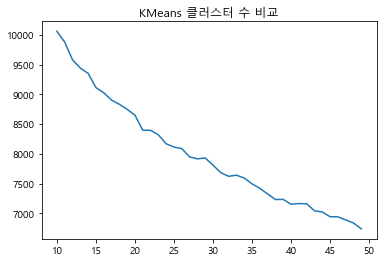

In [242]:
plt.plot(range(start,end),inertia)
plt.title("KMeans 클러스터 수 비교")

In [243]:
n_clusters = 50
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"]= predict 

In [244]:
df["cluster"].value_counts().head(10)

6     51
5     21
29    19
11    18
25    16
17    14
1     13
49    12
7     11
12    11
Name: cluster, dtype: int64

In [245]:
# batch_size 쓸 수 있는 MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
b_inertia =[]

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)  #random_state 값 고정 
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.35it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

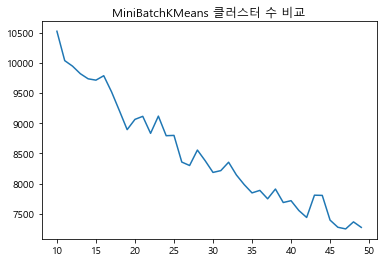

In [246]:
plt.plot(range(start,end),b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [247]:
cls = MiniBatchKMeans(n_clusters=48, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"]= predict 

In [248]:
df["bcluster"].value_counts().head(10)

38    65
2     20
40    18
0     17
6     17
35    17
9     16
3     13
36    13
1     13
Name: bcluster, dtype: int64

In [249]:
#wordcloud

In [250]:
from wordcloud import WordCloud

In [393]:
#불용어 - 자주 등장하지만 의미가 없어 제외하고 싶은 텍스트
stopwords = ["기자","2020","2021","머니데일리","서울경제","현지시간","머니투데이","굿모닝 증시","머니투데이 뉴욕","특파원","연합뉴스",
             "이데일리","아시아경제","원","달러","이상배","뉴시스","파이낸셜뉴스","굿모닝","모닝 브리핑","외환브리핑","하다","되다","보이다",
             "종합","현지 시간","현지","시간","현지시간","유럽 증시","유럽","증시","오전","경제","서울","마감","대다","비즈","조선","뉴욕","뉴욕증시",
            "외환 브리핑","브리핑","임동욱","최정희","이민지"]

#불용어 제거하지 않고 그리기
# stopwords =[]
def displayWordCloud(data = None, backgroundcolor = 'white', width=1280 , height=768):
    wordcloud =WordCloud(
                        font_path = "C:\Windows\Fonts\Malgunbd.ttf" ,
                        stopwords = stopwords,
                        background_color =backgroundcolor,
                        width = width, height = height).generate(data)
   
    plt.figure(figsize =(15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

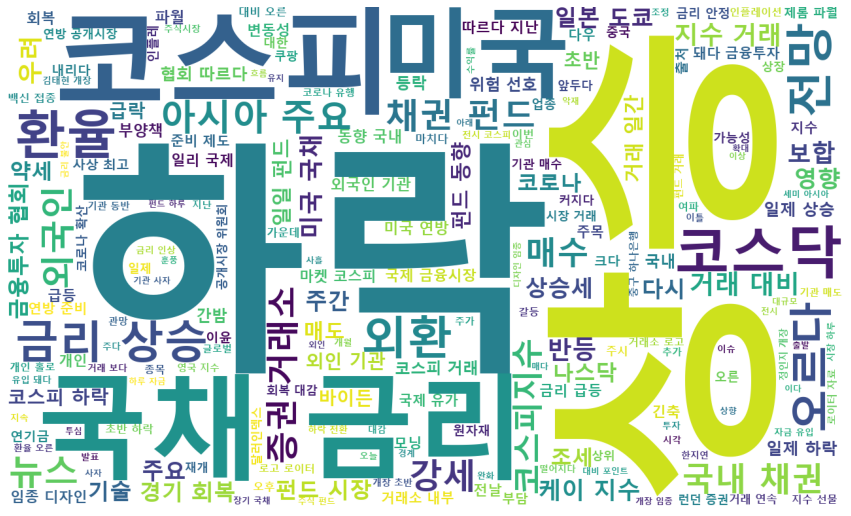

In [394]:
news = " ".join(token_list)
displayWordCloud(news)